Raw Dataset:

Normalized Data:


,subtotal,total_items,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,Delivery Duration
0,0.405632,0.295944,0.812252,-0.245309,0.138778,-0.342228,-0.863077,-0.703695,1.517692,1.441357,0.553199
1,-0.436932,-0.826288,-1.031168,1.371906,0.425312,-1.268667,-1.236228,-1.064348,1.517692,0.659010,0.701792
2,-0.436932,-0.826288,-1.031168,2.331109,1.315168,-1.268667,-1.298420,-1.102311,1.517692,0.659010,-0.658586
3,2.296891,1.044099,1.426726,-0.162818,1.137197,-1.268667,-1.267324,-1.064348,1.517692,-1.175617,0.126224
4,0.656597,-0.078134,0.197779,0.796385,0.781254,-1.123911,-1.111844,-0.931475,1.517692,0.476005,-0.289228


C:\Users\hi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Dataset with Cluster Labels:


,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,Delivery Duration,Cluster
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0,1
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0,1
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0,1
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0,0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0,1


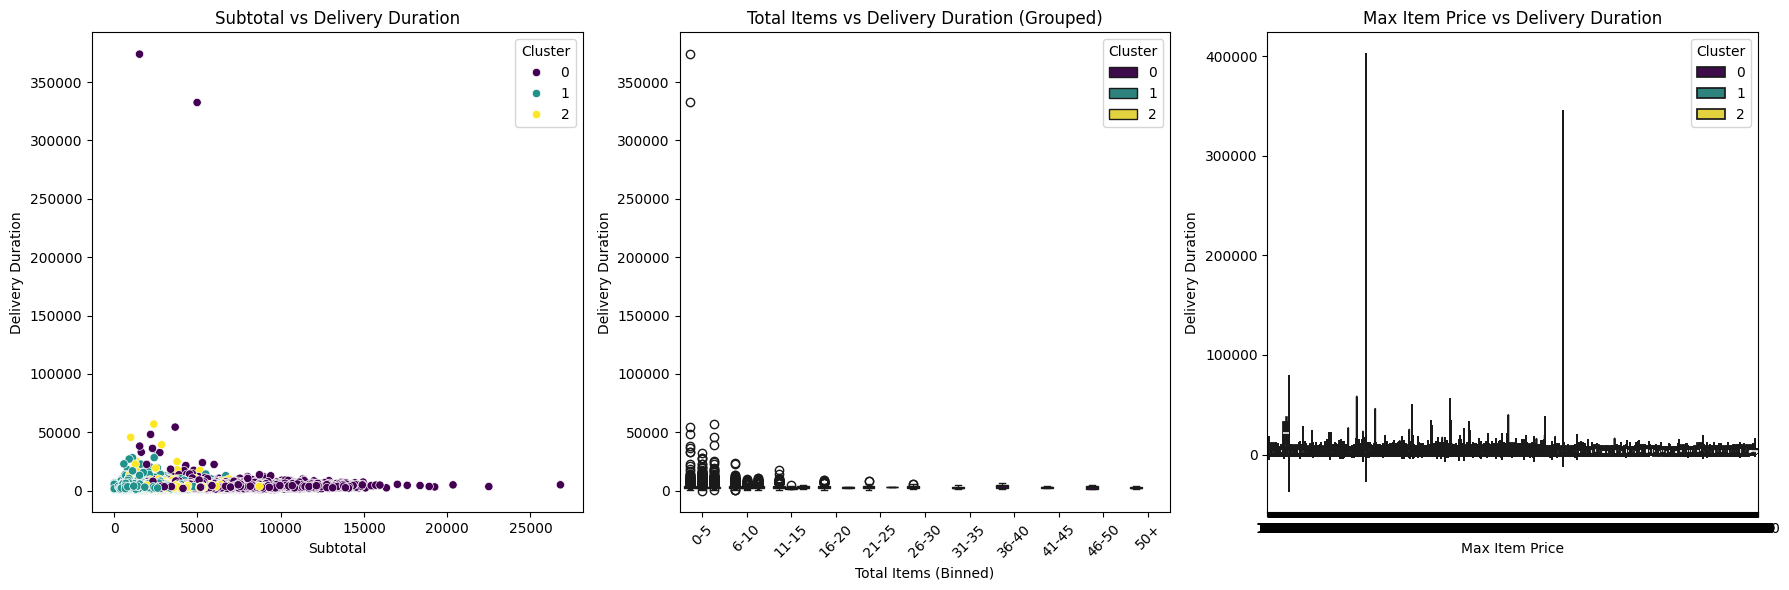

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from IPython.display import display

class DataWrangler:
    def __init__(self, url):
        self.url = url
        self.df = None
        self.features = None

    def load_data(self):
        # Load the dataset
        self.df = pd.read_csv(self.url)
        print("Raw Dataset:")

    def preprocess_data(self):
        # Convert datetime columns to datetime objects
        self.df['created_at'] = pd.to_datetime(self.df['created_at'])
        self.df['actual_delivery_time'] = pd.to_datetime(self.df['actual_delivery_time'])


        # Feature engineering
        self.df['Delivery Duration'] = (self.df['actual_delivery_time'] - self.df['created_at']).dt.total_seconds()


    def select_features(self):
        # Select relevant columns for clustering
        self.features = self.df[['subtotal', 
                                 'total_items', 
                                 'num_distinct_items', 
                                 'min_item_price', 
                                 'max_item_price', 
                                 'total_onshift_dashers', 
                                 'total_busy_dashers', 
                                 'total_outstanding_orders', 
                                 'estimated_order_place_duration', 
                                 'estimated_store_to_consumer_driving_duration', 
                                 'Delivery Duration']]

        # Handle missing values if any
        self.features = self.features.dropna()

    def plot_histograms(self):
        # Plot histograms for each feature
        self.features.hist(figsize=(15, 10), bins=30)
        plt.tight_layout()

    def plot_boxplots(self):
        # Plot box plots for each feature
        plt.figure(figsize=(15, 10))
        self.features.boxplot(rot=45)
        plt.tight_layout()

    def plot_pairplot(self):
        # Plot pair plots for features
        sns.pairplot(self.features)   
        plt.tight_layout()
      

    def plot_violinplots(self):
        # Plot violin plots for each feature
        plt.figure(figsize=(15, 10))
        sns.violinplot(data=self.features, inner="quart")
        plt.xticks(rotation=45)
        plt.tight_layout()

    def get_features(self):
        return self.features

class Clustering:
    def __init__(self, df, features):
        self.df = df
        self.features = features
        self.features_scaled = None

    def normalize_data(self):
        # Normalize data
        scaler = StandardScaler()
        self.features_scaled = scaler.fit_transform(self.features)
        self.features_scaled = pd.DataFrame(self.features_scaled, columns=self.features.columns)

        # Print the first few rows of the normalized data
        print("\nNormalized Data:")
        display(self.features_scaled.head())

    def apply_kmeans(self, n_clusters=3):
        # Apply K-Means clustering algorithm to the normalized data
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(self.features_scaled)

        # Assign cluster labels to the dataset
        self.df = self.df.loc[self.features.index]
        self.df['Cluster'] = kmeans.labels_

        # Print the first few rows of the dataframe with cluster labels to verify the changes
        print("\nDataset with Cluster Labels:")
        display(self.df.head())

    def visualize_clusters(self):
        # Group total_items into bins
        self.df['total_items_binned'] = pd.cut(self.df['total_items'], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, float('inf')], labels=['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '50+'])

        # Visualize clusters
        plt.figure(figsize=(18, 6))

        # Scatter Plot: Subtotal vs Delivery Duration
        plt.subplot(1, 3, 1)
        sns.scatterplot(x=self.df['subtotal'], y=self.df['Delivery Duration'], hue=self.df['Cluster'], palette='viridis')
        plt.xlabel('Subtotal')
        plt.ylabel('Delivery Duration')
        plt.title('Subtotal vs Delivery Duration')

        # Box Plot: Total Items vs Delivery Duration (Grouped)
        plt.subplot(1, 3, 2)
        sns.boxplot(x=self.df['total_items_binned'], y=self.df['Delivery Duration'], hue=self.df['Cluster'], palette='viridis')
        plt.xlabel('Total Items (Binned)')
        plt.ylabel('Delivery Duration')
        plt.title('Total Items vs Delivery Duration (Grouped)')
        plt.xticks(rotation=45)

        # Violin Plot: Max Item Price vs Delivery Duration
        plt.subplot(1, 3, 3)
        sns.violinplot(x=self.df['max_item_price'], y=self.df['Delivery Duration'], hue=self.df['Cluster'], palette='viridis', split=True)
        plt.xlabel('Max Item Price')
        plt.ylabel('Delivery Duration')
        plt.title('Max Item Price vs Delivery Duration')

        plt.tight_layout()
        plt.show()

# Usage
url = 'https://raw.githubusercontent.com/marcanthonny/projectDSML/refs/heads/main/historical_data.csv'
data_wrangler = DataWrangler(url)
data_wrangler.load_data()
data_wrangler.preprocess_data()
data_wrangler.select_features()
features = data_wrangler.get_features()

clustering = Clustering(data_wrangler.df, features)
clustering.normalize_data()
clustering.apply_kmeans(n_clusters=3)
clustering.visualize_clusters()